In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("16325569497737558.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df["output"].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [21]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [22]:
X=df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall',]].values
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [23]:
y=df["output"].values
y[0:5]

array([1, 1, 1, 1, 1])

In [24]:
print (X[0:5])
scaler=preprocessing.StandardScaler()
X=scaler.fit(X).transform(X.astype(float))
print(X[0:5])

[[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
    1. ]
 [ 37.    1.    2.  130.  250.    0.    1.  187.    0.    3.5   0.    0.
    2. ]
 [ 41.    0.    1.  130.  204.    0.    0.  172.    0.    1.4   2.    0.
    2. ]
 [ 56.    1.    1.  120.  236.    0.    1.  178.    0.    0.8   2.    0.
    2. ]
 [ 57.    0.    0.  120.  354.    0.    1.  163.    1.    0.6   2.    0.
    2. ]]
[[ 0.95  0.68  1.97  0.76 -0.26  2.39 -1.01  0.02 -0.7   1.09 -2.27 -0.71
  -2.15]
 [-1.92  0.68  1.   -0.09  0.07 -0.42  0.9   1.63 -0.7   2.12 -2.27 -0.71
  -0.51]
 [-1.47 -1.47  0.03 -0.09 -0.82 -0.42 -1.01  0.98 -0.7   0.31  0.98 -0.71
  -0.51]
 [ 0.18  0.68  0.03 -0.66 -0.2  -0.42  0.9   1.24 -0.7  -0.21  0.98 -0.71
  -0.51]
 [ 0.29 -1.47 -0.94 -0.66  2.08 -0.42  0.9   0.58  1.44 -0.38  0.98 -0.71
  -0.51]]


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split( X,y, test_size=0.2, random_state=4)
print("Train set: ",X_train.shape, y_train.shape)
print("Test set: ",X_test.shape, y_test.shape) 

Train set:  (242, 13) (242,)
Test set:  (61, 13) (61,)


In [26]:
k=1
neight = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
print(neight)

KNeighborsClassifier(n_neighbors=1)


In [27]:
yhat=neight.predict(X_test)
print (yhat[0:5])
print (y[0:5])

[1 1 1 1 0]
[1 1 1 1 1]


In [28]:
from sklearn import metrics
print ("Train set accurasi: ", metrics.accuracy_score(y_train,neight.predict(X_train)))
print ("Test set accurasi: ", metrics.accuracy_score(y_test,yhat))

Train set accurasi:  1.0
Test set accurasi:  0.7704918032786885


In [29]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)

[0.77 0.77 0.8  0.8  0.8  0.82 0.84 0.82 0.82]


In [30]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8360655737704918 with k= 7


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR=LogisticRegression(C=0.01, solver='liblinear',).fit(X_train,y_train)
print(LR)

LogisticRegression(C=0.01, solver='liblinear')


In [32]:
yhat=LR.predict(X_test)
print(yhat)
print(y_test)

[1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1]


In [33]:
yhat_prob=LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.38, 0.62],
       [0.72, 0.28],
       [0.4 , 0.6 ],
       [0.19, 0.81],
       [0.4 , 0.6 ]])

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[33  3]
 [ 4 21]]


Confusion matrix, without normalization
[[33  3]
 [ 4 21]]


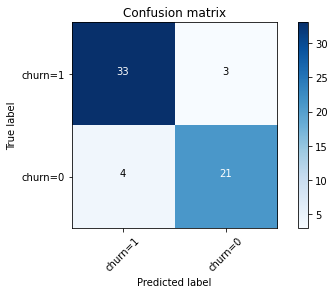

In [35]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [36]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61



In [37]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4363789674264379

In [38]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.8848609284270637

In [ ]:
#یه سوال چرا وقتی از همه دیتا هام استفاده کردم درست شد؟
#بعد مگه اقای جادی نگفته بودن که نباید با بیل دیتا بریزین؟